In [1]:
#How to predict dropout rates
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the files
df = pd.read_csv("student dropout.csv")

In [3]:
#look for rows that have null or missing values
df.isnull().sum()

School                         0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Father_Education               0
Mother_Job                     0
Father_Job                     0
Reason_for_Choosing_School     0
Guardian                       0
Travel_Time                    0
Study_Time                     0
Number_of_Failures             0
School_Support                 0
Family_Support                 0
Extra_Paid_Class               0
Extra_Curricular_Activities    0
Attended_Nursery               0
Wants_Higher_Education         0
Internet_Access                0
In_Relationship                0
Family_Relationship            0
Free_Time                      0
Going_Out                      0
Weekend_Alcohol_Consumption    0
Weekday_Alcohol_Consumption    0
Health_Status                  0
Number_of_Absences             0
Grade_1   

In [4]:
#Check the columns
df.columns

Index(['School', 'Gender', 'Age', 'Address', 'Family_Size', 'Parental_Status',
       'Mother_Education', 'Father_Education', 'Mother_Job', 'Father_Job',
       'Reason_for_Choosing_School', 'Guardian', 'Travel_Time', 'Study_Time',
       'Number_of_Failures', 'School_Support', 'Family_Support',
       'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship',
       'Family_Relationship', 'Free_Time', 'Going_Out',
       'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
       'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade', 'Dropped_Out'],
      dtype='object')

In [31]:
#Create the dummy variables for key features. 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convert Gender into numeric values
df["Gender"] = le.fit_transform(df["Gender"])
df["Parental_Status"] = le.fit_transform(df["Parental_Status"])
df = pd.get_dummies(df, columns=['Mother_Job'])
df = pd.get_dummies(df, columns=['Father_Job'])
df = pd.get_dummies(df, columns=['Reason_for_Choosing_School'])
df["Guardian"] = le.fit_transform(df["Guardian"])
df["School_Support"] = le.fit_transform(df["School_Support"])
df["Extra_Paid_Class"] = le.fit_transform(df["Extra_Paid_Class"])
df["Extra_Curricular_Activities"] = le.fit_transform(df["Extra_Curricular_Activities"])
df["Attended_Nursery"] = le.fit_transform(df["Attended_Nursery"])
df["Wants_Higher_Education"] = le.fit_transform(df["Wants_Higher_Education"])
df["Internet_Access"] = le.fit_transform(df["Internet_Access"])
df["In_Relationship"] = le.fit_transform(df["In_Relationship"])
df["School"] = le.fit_transform(df["School"])
df["Family_Support"] = le.fit_transform(df["Family_Support"])




KeyError: "None of [Index(['Mother_Job'], dtype='object')] are in the [columns]"

In [17]:
df.columns

Index(['School', 'Gender', 'Age', 'Address', 'Family_Size', 'Parental_Status',
       'Mother_Education', 'Father_Education', 'Guardian', 'Travel_Time',
       'Study_Time', 'Number_of_Failures', 'School_Support', 'Family_Support',
       'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship',
       'Family_Relationship', 'Free_Time', 'Going_Out',
       'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
       'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade', 'Dropped_Out', 'Mother_Job_at_home', 'Mother_Job_health',
       'Mother_Job_other', 'Mother_Job_services', 'Mother_Job_teacher',
       'Father_Job_at_home', 'Father_Job_health', 'Father_Job_other',
       'Father_Job_services', 'Father_Job_teacher',
       'Reason_for_Choosing_School_course', 'Reason_for_Choosing_School_home',
       'Reason_for_Choosing_School_other',
       'Reason_for_Choosing_Sc

In [7]:
df[["School_Support", "Family_Support", "Extra_Paid_Class", "Extra_Curricular_Activities", 
    "Attended_Nursery", "Wants_Higher_Education", "Internet_Access", "In_Relationship"]]

,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Attended_Nursery,Wants_Higher_Education,Internet_Access,In_Relationship
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,0,0,1,1,1,0
3,0,1,0,1,1,1,1,1
4,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...
644,0,0,0,1,0,1,1,0
645,0,1,0,0,1,1,1,0
646,0,0,0,1,1,1,0,0
647,0,0,0,0,0,1,1,0


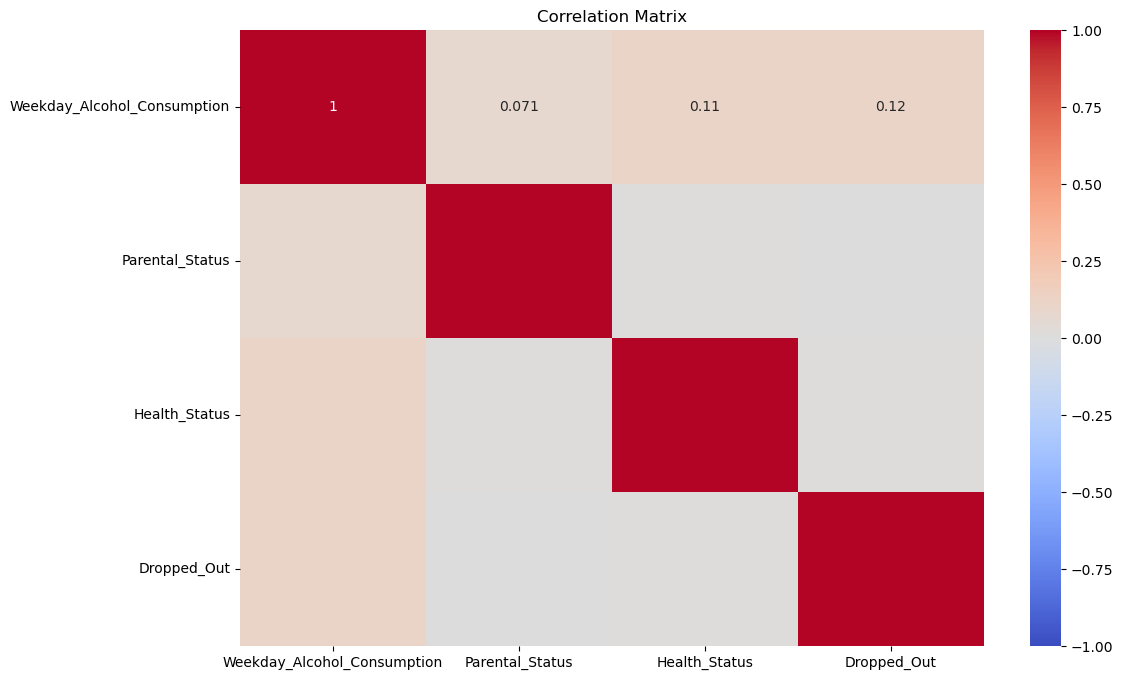

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df[["Weekday_Alcohol_Consumption","Parental_Status","Health_Status","Dropped_Out"]].corr()
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [30]:
import dash
from dash import dcc, html
import plotly.express as px

# Initialize the app
app = dash.Dash(__name__)

# Create the correlation heatmap with Plotly
corr_fig = px.imshow(corr_matrix, color_continuous_scale='RdBu_r', title="Correlation Matrix")

# Create other visualizations (scatter, bar, etc.)
scatter_fig = px.scatter(df, x='Final_Grade', y='Dropped_Out', title="Dropout Rates vs Final Grade")
bar_fig = px.bar(df, x='Mother_Education', y='Dropped_Out', title="Dropout Rates by Mother's Education")

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Dropout Rate Analysis Dashboard"),
    dcc.Graph(figure=corr_fig),  # Correlation matrix
    dcc.Graph(figure=scatter_fig),  # Scatter plot
    dcc.Graph(figure=bar_fig),  # Bar plot
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

In [21]:
from sklearn.model_selection import train_test_split

# Features (X) - all columns except 'Dropped_Out'
X = df.drop(['Dropped_Out', 'Address', 'Family_Size'], axis=1)

# Target (y) - the 'Dropped_Out' column
y = df['Dropped_Out']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model on the scaled data
log_reg = LogisticRegression(class_weight='balanced', max_iter=500)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.88
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


C:\Users\mukuk\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

C:\Users\mukuk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split



In [25]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [26]:
y_pred = rf_classifier.predict(X_test)

In [27]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores: {scores}")
print(f"Average F1 Score: {scores.mean()}")

Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Average F1 Score: 1.0
